In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
df = pd.read_csv('car_sales_data.csv')
df.head(50)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [42]:
len(df)

59998

In [43]:
df.isnull().sum()

year                0
make              254
model             256
trim              454
body             1863
transmission     7303
vin                 0
state               0
condition       11793
odometer           76
color             148
interior          148
seller              1
mmr                 1
sellingprice        1
saledate            1
dtype: int64

In [44]:
df.loc[:,'make'] = df.loc[:,['make']].fillna(df['make'].mode()[0])
df.loc[:,'model'] = df.loc[:,['model']].fillna(df['model'].mode()[0])
df.loc[:,'body'] = df.loc[:,['body']].fillna(df['body'].mode()[0])
df.loc[:,'trim'] = df.loc[:,['trim']].fillna(df['trim'].mode()[0])
df.loc[:,'color'] = df.loc[:,['color']].fillna(df['color'].mode()[0])
df.loc[:,'interior'] = df.loc[:,['interior']].fillna(df['interior'].mode()[0])
df.loc[:,'transmission'] = df.loc[:,['transmission']].fillna(df['transmission'].mode()[0])

df.loc[:,'condition'] = df.loc[:,['condition']].fillna(df['condition'].mean())
df.loc[:,'odometer'] = df.loc[:,['odometer']].fillna(df['odometer'].mean())
df.loc[:,'mmr'] = df.loc[:,['mmr']].fillna(df['mmr'].mean())

df.dropna(subset=['sellingprice'],axis='rows',inplace=True)

In [45]:
df.isnull().sum()


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

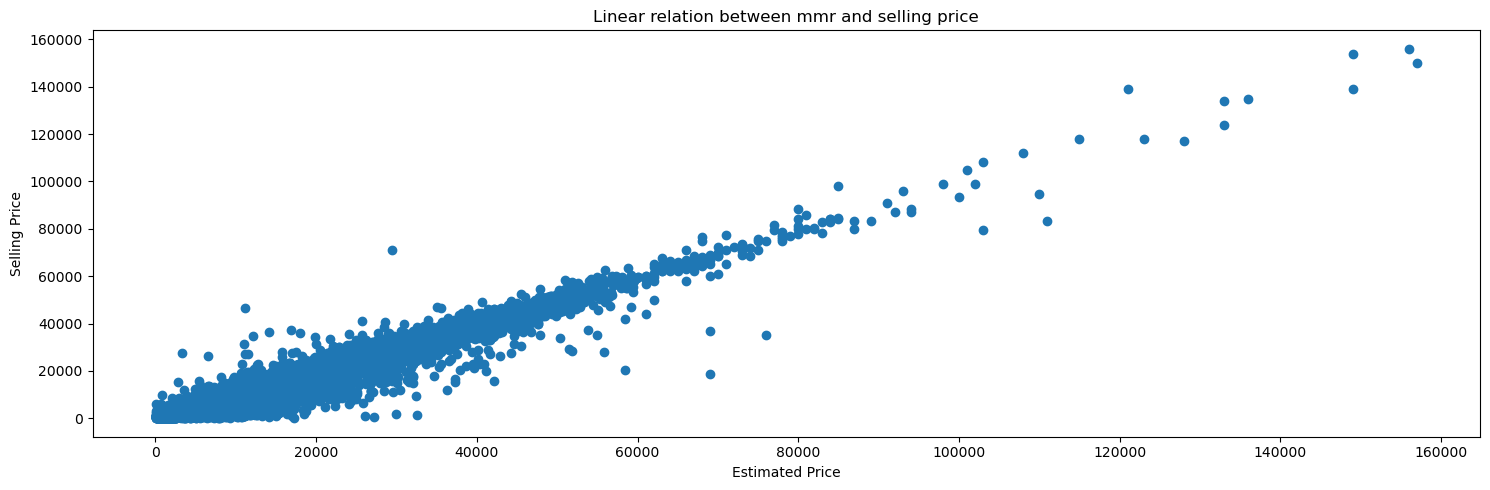

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(df['mmr'],df['sellingprice'])
plt.xlabel("Estimated Price")
plt.ylabel('Selling Price')
plt.title("Linear relation between mmr and selling price")
plt.tight_layout()
plt.show()

In [16]:
def print_metrics(model,X_train,X_test,y_train,y_test):
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    final_mse_train = mean_squared_error(y_train, predictions_train)
    final_mse_test = mean_squared_error(y_test, predictions_test)

    print(f'Final RMSE on the train set: {np.sqrt(final_mse_train)}')
    print(f'Final RMSE on the test set: {np.sqrt(final_mse_test)}')

In [17]:
X  = df['mmr']
y = df['sellingprice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train,X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.175e+06
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:30:17   Log-Likelihood:            -4.3048e+05
No. Observations:               47997   AIC:                         8.610e+05
Df Residuals:                   47995   BIC:                         8.610e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -141.8805     13.868    -10.231      0.0

In [18]:
print('=='*60)
predictions = model.predict(X_test_const)
print_metrics(model,X_train_const,X_test_const,y_train,y_test)

Final RMSE on the train set: 1900.7006972340353
Final RMSE on the test set: 1818.8509254613393


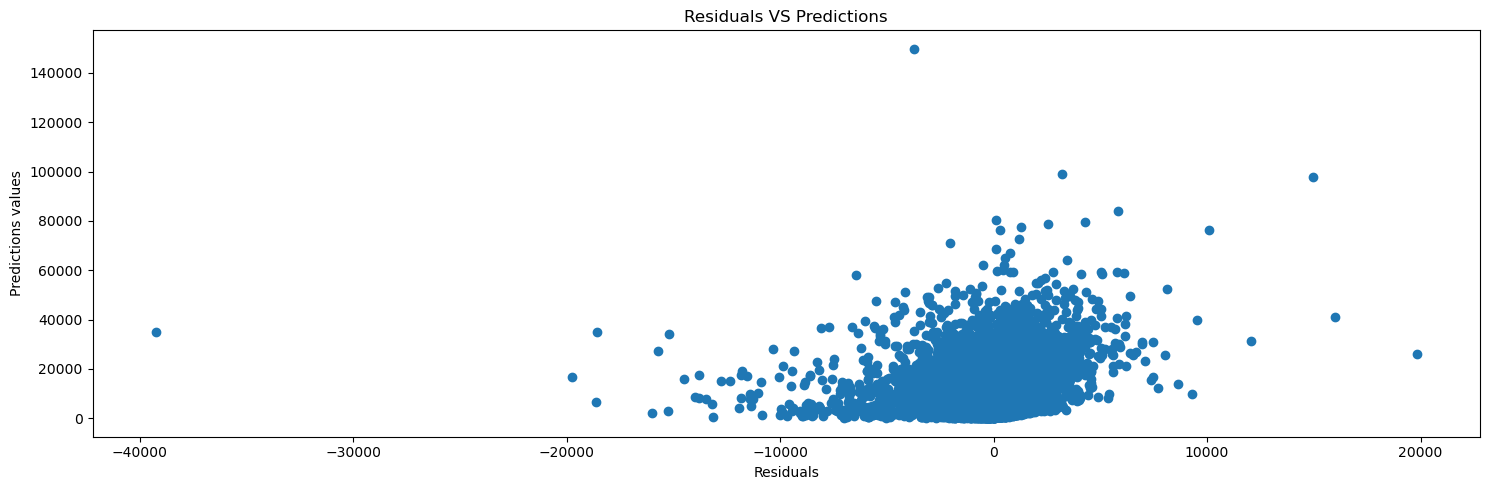

In [19]:
residuals = (y_test - predictions)
plt.figure(figsize=(15,5))
plt.scatter(residuals,y_test)
plt.xlabel('Residuals')
plt.ylabel('Predictions values')
plt.title('Residuals VS Predictions')
plt.tight_layout()
plt.show()

# Logistic Regression

In [21]:
unique_values = df['transmission'].unique()

# Print the unique values
print(unique_values)

['automatic' 'manual']


In [22]:
df = df.replace('automatic',0)
df = df.replace('manual',1)


In [24]:
df.head(100)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,0,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,0,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,0,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,0,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,0,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,BMW,6 Series,650i,Convertible,0,wbayp9c53ed169288,ca,37.0,8891.0,silver,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
96,2014,Chevrolet,Cruze,2LT,Sedan,0,1g1pe5sb8e7420706,ca,2.0,8154.0,silver,black,enterprise vehicle exchange / tra / rental / t...,14150.0,10000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
97,2014,Chevrolet,Silverado 1500,LT,Crew Cab,0,3gcpcrecxeg363552,ca,37.0,6726.0,black,black,repo remarketing/visterra credit union,26900.0,30250.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
98,2014,Chevrolet,Cruze,2LT,Sedan,0,1g1pe5sb4e7109323,ca,37.0,36771.0,silver,black,avis rac/san leandro,13000.0,13600.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)


<Axes: >

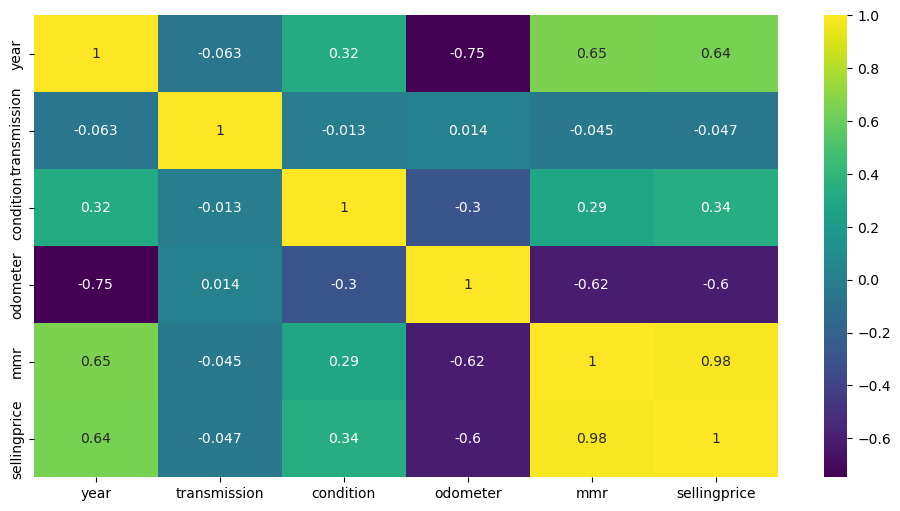

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [33]:
x = df[['mmr','sellingprice']]
y= df['transmission']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(x,y,random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [36]:
from sklearn.model_selection import GridSearchCV
reg.fit(x_train, y_train)

LogisticRegression()

In [37]:
predicted = reg.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
score= accuracy_score(predicted, y_test)
print(score)

0.9637333333333333


In [38]:
df= pd.DataFrame(y_test,predicted)

In [39]:
df= pd.DataFrame({"Actual Term": y_test, "Predicted Term": predicted})
print(df)

       Actual Term  Predicted Term
43722            0               0
43801            0               0
45569            0               0
8124             0               0
9660             0               0
...            ...             ...
56105            0               0
58014            0               0
11319            0               0
27829            0               0
45908            0               0

[15000 rows x 2 columns]


In [40]:
feat = np.array([[13450,12300]])
print("predicted : {}".format(reg.predict(feat)))

predicted : [0]


C:\Users\Pranav\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
